In [331]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [332]:
Cg = 1.78
eps = 1e-5
laplace_scale = 1.0 / (2**.5)

## Helper Functions

In [333]:
def randomNumberGenerator(n,A,gamma=(2*Cg)**.5):
    """Draws random numbers from Normal, Laplace and Cauchy distributions."""
    distributions = {}
    distributions['Normal'] = A + np.random.randn(n)
    distributions['Laplace'] = A + np.random.laplace(size = n,scale = laplace_scale)
    distributions['Cauchy'] = A + scipy.stats.cauchy.rvs(size=n,loc = 0, scale = gamma)
    return distributions

def f(data,gamma,A):
    """Optimization function for the Cauchy distribution (given gamma)."""
    return np.sum((A-data)/(1 + ((data-A)/gamma)**2))

def df_dA(data,gamma,A):
    """Derivative of f with respect to A."""
    return (f(data,gamma,A+eps) - f(data,gamma,A-eps))/(2*eps)

def nr(data,guess,gamma,iterations=1000):
    """Newton-Raphson method for estimating the scale parameter of a Cauchy distribution."""
    for iteration in range(iterations):
        y = f(data,gamma, guess)
        dy_dA = df_dA(data, gamma, guess)
        guess -= y/dy_dA
        if abs(y) < eps:
            break
    return guess

def MLEestimates(distributions, gamma):
    """Calculates the MLE estimates for Normal, Laplace and Cauchy distributions."""
    estimates = {}
    for key in distributions.keys():
        if key == 'Normal':
            estimates[key] = np.mean(distributions[key])
        elif key == 'Laplace':
            estimates[key] = np.median(distributions[key])
        elif key == 'Cauchy':
            estimates[key] = nr(distributions[key], guess = 3, gamma=gamma,iterations=10000)
    return estimates

## Experiments

In [334]:
def realisations(N,A,num_realisations):
    """Generates random numbers and calculates MLE estimates for multiple realisations."""
    estimates = {"Normal": [], "Laplace": [], "Cauchy": []}
    for i in range(num_realisations):
        distributions = randomNumberGenerator(N,A)
        estimate = MLEestimates(distributions, gamma=(2*Cg)**.5)
        for key in estimate.keys():
            estimates[key].append(estimate[key])
    return estimates

def getStatistics(estimates):
    """Calculates mean and standard deviation of MLE estimates."""
    statistics = {}
    # axs = fig.subplots(1, 3, sharex=True, sharey=True)
    for i,key in enumerate(estimates.keys()):
        fig = plt.figure(figsize=(5, 5), layout="constrained")
        statistics[key] = {
            'mean': np.mean(estimates[key]),
            'var': np.var(estimates[key])
        }
        # plt.title(f'PDF estimates for {key} with mean {statistics[key]["mean"]} and var {statistics[key]["var"]}')
        # plt.hist(estimates[key], bins=30, alpha=0.5, label=''+key, density=True)
        # plt.show()
        # plotCDFs(hist, bin_edges)
        plt.subplot(3, 1, i+1)
        plotCDFs(estimates[key], label=key, color='blue')
        # plt.hist(estimates[key], cumulative=True, label='CDF',histtype='step', alpha=0.8, color='k',range=(-20,20), bins=30)
    plt.show()
    return statistics

# def plotCDFs(hist,bin_edges):
#     for i in range(1, len(hist)):
#         hist[i] += hist[i-1]
#     hist[0] = 0
#     hist /= hist[-1]  # Normalize to make it a CDF
#     plt.bar(bin_edges[:-1],hist,width=(40)/len(bin_edges), color="blue", alpha=0.5)
#     # plt.plot(bin_edges, hist, label='CDF', color='blue')
#     plt.xlabel('Value of $\hat{A}$')
#     plt.ylabel('Cumulative Probability')
#     plt.title('CDF of MLE estimates')
#     plt.legend()
#     plt.show()
def plotCDFs(data, label='CDF', color='blue'):
    sorted_data = np.sort(data)
    cdf = np.linspace(0, 1, len(sorted_data))
    plt.step(sorted_data, cdf, where='post', label=label, color=color)
    plt.xlabel('Value of $\hat{A}$')
    plt.ylabel('Cumulative Probability')
    plt.title('Empirical CDF of MLE estimates')
    plt.xlim(max(-1,np.min(data)), min(2,np.max(data)))
    plt.legend()
    plt.show()

In [335]:
n = 100
A = 1
estimates = realisations(n, A, 10000)
# distributions = randomNumberGenerator(n, A=1, gamma = (2*Cg)**.5)
# estimates = MLEestimates(distributions, gamma=(2*Cg)**.5)
# print(estimates)

In [336]:
np.mean(estimates['Cauchy'])

359594.34364189854

In [337]:
np.mean(estimates['Cauchy'])

359594.34364189854

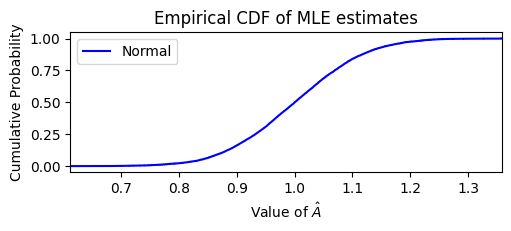

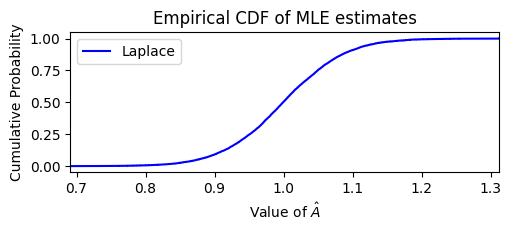

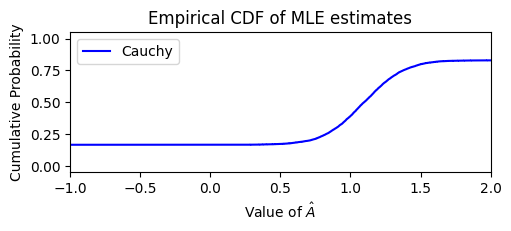

In [338]:
stats = getStatistics(estimates=estimates)

In [339]:
min(distributions['Cauchy'])

-20185.178125460916

In [340]:
hist,bins =  np.histogram(distributions['Normal'], bins=500)

<BarContainer object of 500 artists>

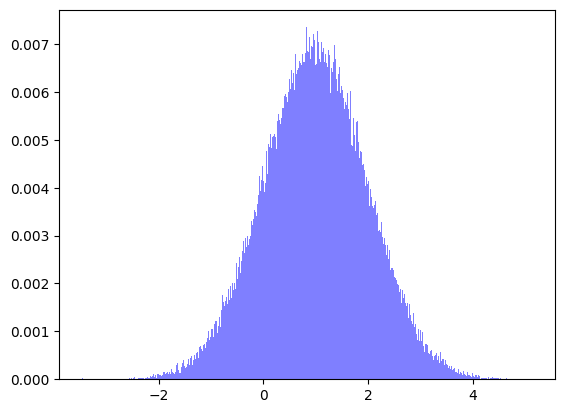

In [341]:
hist = hist/np.sum(hist)
plt.bar(bins[:-1],hist,width=(max(bins) - min(bins))/len(bins), color="blue", alpha=0.5)

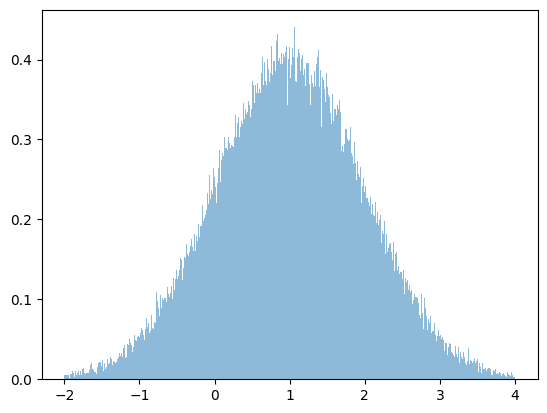

In [342]:
plt.hist(distributions['Normal'],bins=500, density=True, alpha=0.5, label='Laplace', range=(-2,4))
plt.show()